# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('Desktop/Springboard/Mini_Projects/hospital_readmit/data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
#print(clean_hospital_read_df['Number of Discharges'].head())

C:\Users\manas\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


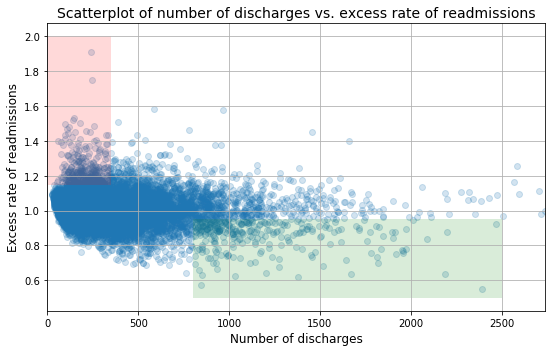

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

In [5]:
# Your turn
# correlation between x and y
# We will first check the overall relation
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
pearsn_r = pearsonr(x, y)
x = np.array(x)
y = np.array(y)
lin_r = linregress(x, y)
print(lin_r)
print(pearsn_r)
print(len(x), len(y))

LinregressResult(slope=-2.8565052943822634e-05, intercept=1.017947557954422, rvalue=-0.09309554287590441, pvalue=1.5022756426615086e-23, stderr=2.849824827849989e-06)
(-0.09309554287590441, 1.5022756426464526e-23)
11494 11494


Average excess readmission ratio: 1.0226183501683501 fraction of small hospitals 0.1033582738820254
LinregressResult(slope=-0.0008388300181880309, intercept=1.0852933566788234, rvalue=-0.24463550033476295, pvalue=1.1955927845526709e-17, stderr=9.654093846252936e-05)
% Excess readmission rate: 63.215488215488215


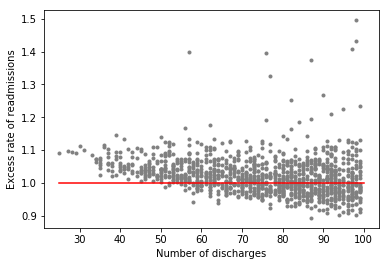

In [6]:
# hospitals/facilities with number of discharges < 100
x_small = x[x<100]
y_small = y[:len(x_small)]
print('Average excess readmission ratio:', y_small.mean(), 'fraction of small hospitals', len(x_small)/len(x))
lin_r = linregress(x_small, y_small)
print(lin_r)

y_high = np.count_nonzero(y_small[y_small>1])/len(y_small)*100
print('% Excess readmission rate:', y_high)

# plotting for smaller facilities
plt.plot(x_small, y_small, marker='.', linestyle='none', color='gray')
plt.plot([25,100], [1, 1], color='red')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.show()


average excess readmission rate: 1.0380543478260869 fraction of large hospitals: 0.040020880459370106
LinregressResult(slope=-3.617737986896958e-05, intercept=1.0873015139910236, rvalue=-0.2904432664991458, pvalue=2.156583618880314e-10, stderr=5.569370106309421e-06)
% Excess readmission rate: 82.3913043478261


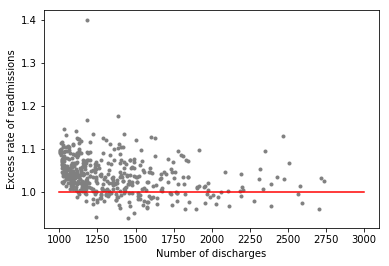

In [8]:
# hospitals/facilities with number of discharges > 1000
x_big = x[x>1000]
y_big = y[:len(x_big)]
print('average excess readmission rate:', y_big.mean(), 'fraction of large hospitals:', len(x_big)/len(x))
lin_r = linregress(x_big, y_big)
print(lin_r)

y_high = np.count_nonzero(y_big[y_big>1])/len(y_big)*100
print('% Excess readmission rate:', y_high)

# plotting for larger facilities
plt.plot(x_big, y_big, marker='.', linestyle='none', color='gray')
plt.plot([1000,3000], [1, 1], color='red')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.show()

The preliminery report says that
1. Overall, rate of excess readmissions (err) is trending down with increasing number of discharges
Our finding:
 The slope of the scatterplot is -2.85e-05 with an r of -0.093. The p-value is practically '0'. A miniscule slope and r suggest that the trend stated above and linear correlation are practically non-existent.
 

2. Lower number of discharges, greater incidence of err: number of discharges < 100, mean err = 1.023, 63% err > 1
Our finding: Similar.


3. Higher number of discharges, greater incidence of lower err: number of discharge > 1000, mean err = 0.978, 44% err > 1
Our finding:
With number of discharge > 1000, mean err = 1.04, and 82% err > 1

Overall, we disagree with the observation, statistics, conclusion and recommendation of the preliminary report.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

Null hypothesis H0: The population correlation coefficient is not significantly different from zero.
$$H_0: slope = 0$$

Alternate hypothesis Ha: The population correlation coefficient is significantly different from zero.
$$H_A: slope \ne 0$$

### 2. Compute and report the observed significance value (or p-value).

LinregressResult(slope=-2.8565052943822634e-05, intercept=1.017947557954422, rvalue=-0.09309554287590441, pvalue=1.5022756426615086e-23, stderr=2.849824827849989e-06)


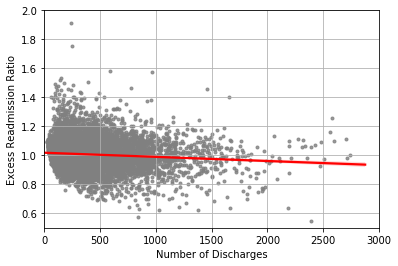

In [9]:
lin_r = linregress(x, y)
print(lin_r)

#ax = sns.regplot(y='Excess Readmission Ratio', x='Number of Discharges', data=clean_hospital_read_df, fit_reg = True, marker='.', color='gray')
ax = sns.regplot(x=x, y=y, fit_reg = True, marker='.', scatter_kws={"color": "gray"}, line_kws={"color": "red"})
ax.set(xlabel='Number of Discharges', ylabel='Excess Readmission Ratio')
ax.set_xlim(0, 3000)
ax.set_ylim(0.5, 2)
ax.grid(True)
plt.show()

The p-value is 1.5E- 23 much lower than 0.05. So we reject the hypothesis that the slope is '0'. So, there is actually some slope even if it is practically insignificant.

In [10]:
# how many datapoints are below the fitted line (using the calculated solpe and intercept)
p = (np.sum(y/x < - 0.0000285 + 1.01794/x))/len(x)
print('fraction of points below the fitted line:', p)

fraction of points below the fitted line: 0.5260135722985906


52% of data below the line and 48% of data above the line. The residual distribution is approximately normal.

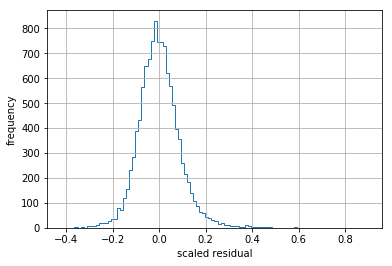

In [11]:
fitted = - 0.00002856*x + 1.01794
residual = y - fitted
res_scaled = residual/np.mean(y)

plt.hist(res_scaled, bins=100, histtype='step')
plt.xlabel('scaled residual')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

### 3. Report statistical significance for $\alpha$ = .01. 

The p-value is much lower than 0.01, so even for this case, we reject the null hypothesis.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

We found that the slope of the readmission vs. discharge is -2.8565e-05, an intercept of 1.017947557954422. We concluded that this is statistically significant. But, is it practically significant? A slope of -2.86e-05 means that the readmission ratio would decrease only 0.028 units when the # of discharge is 1000, which is quite small. An intercept of 1.01 (constant part) suggests that even though the discharge is '0' there will be an excess readmission ratio of 1.01, which is practically impossible. Also, the linear fit is very weak with an r^2 of 0.0086. In any aspect it does not seem to be practically significant in order to support the previous conclusion.

So, overall I won't recommend to demonstrate upgraded resource allocation for quality care to continue operation for small hospitals.

###  5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

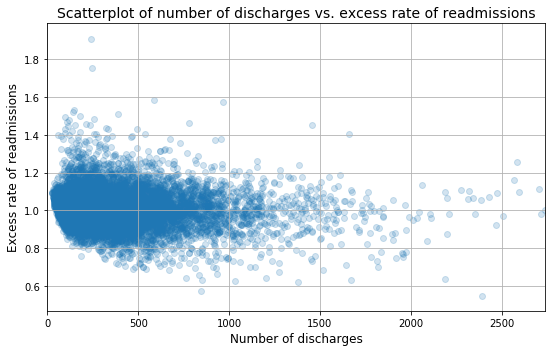

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [65]:
#categorized the hospitals into 3 categories based on # of discharge: 'below 300', 'below 1000', and 'above 1000'
x_range=[]
for i in range(len(x)):
    if x[i] <= 300:
        x_range.append('below 300')
    else:
        if x[i] > 300 and x[i] <= 1000:
            x_range.append('below 1000') 
        else:
            x_range.append('above 1000') 
            

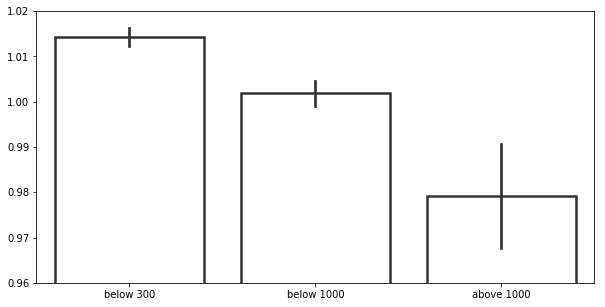

In [68]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x_range, y, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
ax.set_ylim([0.96, 1.02])
plt.show()

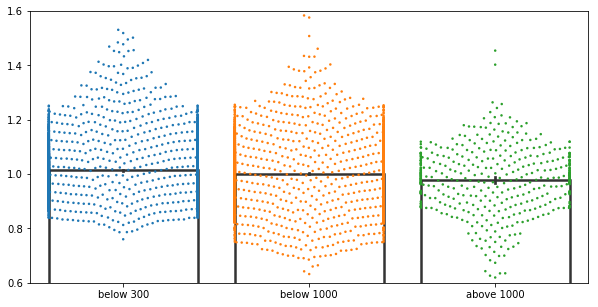

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x_range, y, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
ax = sns.swarmplot(x_range, y, marker='.')
ax.set_ylim(0.6, 1.6)
plt.show()

This way we can much clearly view the points in each category under concern and its spread.